In [58]:
import pandas as pd
import numpy as np
import urllib.request # to request URLs and get the HTML from it
import requests
import string
import matplotlib.pyplot as plt
import schedule
import time

In [60]:
data = pd.read_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11/download/covidtestin')

data.head()

,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Under Investigation,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths
0,2020-01-26,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-27,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-28,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-30,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-31,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Check columns
data.columns

Index(['Reported Date', 'Confirmed Negative', 'Presumptive Negative',
       'Presumptive Positive', 'Confirmed Positive', 'Resolved', 'Deaths',
       'Total Cases',
       'Total patients approved for testing as of Reporting Date',
       'Total tests completed in the last day', 'Under Investigation',
       'Number of patients hospitalized with COVID-19',
       'Number of patients in ICU with COVID-19',
       'Number of patients in ICU on a ventilator with COVID-19',
       'Total Positive LTC Resident Cases', 'Total Positive LTC HCW Cases',
       'Total LTC Resident Deaths', 'Total LTC HCW Deaths'],
      dtype='object')

In [64]:
# Check data types
data.dtypes

Reported Date                                                object
Confirmed Negative                                          float64
Presumptive Negative                                        float64
Presumptive Positive                                        float64
Confirmed Positive                                          float64
Resolved                                                    float64
Deaths                                                      float64
Total Cases                                                 float64
Total patients approved for testing as of Reporting Date    float64
Total tests completed in the last day                       float64
Under Investigation                                           int64
Number of patients hospitalized with COVID-19               float64
Number of patients in ICU with COVID-19                     float64
Number of patients in ICU on a ventilator with COVID-19     float64
Total Positive LTC Resident Cases               

In [66]:
# convert the 'Date' column to datetime format 
data['Reported Date']= pd.to_datetime(data['Reported Date']) 

In [68]:
# Check numm values
data.isnull().sum()

Reported Date                                                 0
Confirmed Negative                                          181
Presumptive Negative                                        216
Presumptive Positive                                        203
Confirmed Positive                                            2
Resolved                                                     12
Deaths                                                       40
Total Cases                                                   2
Total patients approved for testing as of Reporting Date      6
Total tests completed in the last day                        69
Under Investigation                                           0
Number of patients hospitalized with COVID-19                56
Number of patients in ICU with COVID-19                      56
Number of patients in ICU on a ventilator with COVID-19      56
Total Positive LTC Resident Cases                           103
Total Positive LTC HCW Cases            

In [70]:
data = data.fillna(0)
data.head()

,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Under Investigation,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths
0,2020-01-26,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-27,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-28,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-30,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-31,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
data = data.rename(columns={'Confirmed Positive': 'Positive Cases', 'Number of patients hospitalized with COVID-19':'Hospitalization', 'Number of patients in ICU with COVID-19':'Enter ICU', 'Number of patients in ICU on a ventilator with COVID-19':'ICU on ventilator', 'Total tests completed in the last day':'Total tests completed'})

In [72]:
new_data = data[['Reported Date', 'Positive Cases', 'Total Cases', 'Deaths','Hospitalization', 'Enter ICU', 'ICU on ventilator', 'Total tests completed']]
new_data.head()

,Reported Date,Positive Cases,Total Cases,Deaths,Hospitalization,Enter ICU,ICU on ventilator,Total tests completed
0,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-28,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-30,2.0,2.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-31,2.0,2.0,0.0,0.0,0.0,0.0,0.0


In [73]:
#Import calculations
new_data['New Cases'] = new_data['Total Cases'].diff()
new_data['New Patients Hospitalized']=new_data['Hospitalization'].diff()
new_data['New Patients in ICU'] = new_data['Enter ICU'].diff()
new_data['New Patients on ventilator'] = new_data['ICU on ventilator'].diff()
new_data['Positivity Rate'] = new_data['Positive Cases']/new_data['Total tests completed']*100

In [74]:
#Replace infinite and NAN with 0
new_data = new_data.replace([np.inf, -np.inf], np.nan)
new_data = new_data.fillna(0)

In [75]:
#Create new dataframe of important information
data_new = new_data[['Reported Date','New Cases', 'New Patients Hospitalized','New Patients in ICU', 'New Patients on ventilator', 'Positivity Rate']]
data_new.tail()

,Reported Date,New Cases,New Patients Hospitalized,New Patients in ICU,New Patients on ventilator,Positivity Rate
223,2020-09-16,315.0,-3.0,1.0,1.0,8.052571
224,2020-09-17,293.0,9.0,1.0,0.0,6.907839
225,2020-09-18,401.0,5.0,-1.0,-2.0,7.402445
226,2020-09-19,407.0,6.0,0.0,0.0,7.398562
227,2020-09-20,365.0,-1.0,3.0,0.0,7.610836


In [76]:
dataa = data_new
dataa = dataa.set_index('Reported Date')
dataa.tail()

,New Cases,New Patients Hospitalized,New Patients in ICU,New Patients on ventilator,Positivity Rate
Reported Date,,,,,
2020-09-16,315.0,-3.0,1.0,1.0,8.052571
2020-09-17,293.0,9.0,1.0,0.0,6.907839
2020-09-18,401.0,5.0,-1.0,-2.0,7.402445
2020-09-19,407.0,6.0,0.0,0.0,7.398562
2020-09-20,365.0,-1.0,3.0,0.0,7.610836


In [77]:
#Replace negative values with 0
dataa[dataa < 0] = 0
dataa.tail()

,New Cases,New Patients Hospitalized,New Patients in ICU,New Patients on ventilator,Positivity Rate
Reported Date,,,,,
2020-09-16,315.0,0.0,1.0,1.0,8.052571
2020-09-17,293.0,9.0,1.0,0.0,6.907839
2020-09-18,401.0,5.0,0.0,0.0,7.402445
2020-09-19,407.0,6.0,0.0,0.0,7.398562
2020-09-20,365.0,0.0,3.0,0.0,7.610836


Text(0.5, 1.0, 'Daily New Cases')

<Figure size 432x288 with 0 Axes>

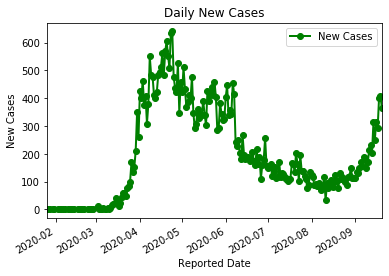

In [78]:
# plotting the daily new cases
fig = plt.figure()  # initiate the figure environment
dataa.plot(y='New Cases',color='green', linewidth=2, marker='o', legend=True)
plt.ylabel('New Cases')
# Make sure you change the title of the figure accordingly. 
plt.title('Daily New Cases')

Text(0.5, 1.0, 'New Patients Hospitalized')

<Figure size 432x288 with 0 Axes>

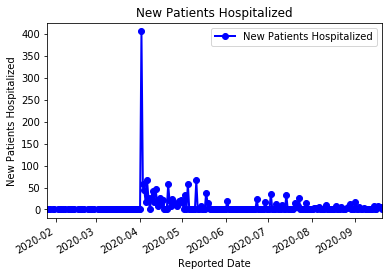

In [79]:
# plotting the daily new patients hospitalization
fig = plt.figure()  # initiate the figure environment
dataa.plot(y='New Patients Hospitalized',color='blue', linewidth=2, marker='o', legend=True)
plt.ylabel('New Patients Hospitalized')
# Make sure you change the title of the figure accordingly. 
plt.title('New Patients Hospitalized')

Text(0.5, 1.0, 'New Patients in ICU')

<Figure size 432x288 with 0 Axes>

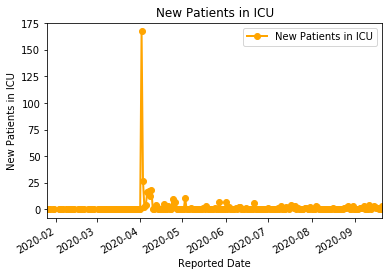

In [80]:
# plotting the daily new patients in ICU
fig = plt.figure()  # initiate the figure environment
dataa.plot(y='New Patients in ICU',color='orange', linewidth=2, marker='o', legend=True)
plt.ylabel('New Patients in ICU')
# Make sure you change the title of the figure accordingly. 
plt.title('New Patients in ICU')

Text(0.5, 1.0, 'New Patients in ICU')

<Figure size 432x288 with 0 Axes>

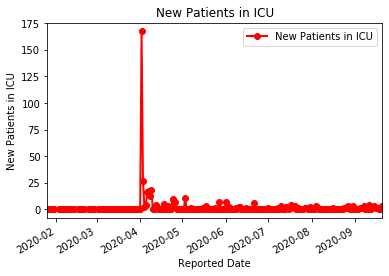

In [81]:
# plotting the daily new patients on ventialtor
fig = plt.figure()  # initiate the figure environment
dataa.plot(y='New Patients in ICU',color='red', linewidth=2, marker='o', legend=True)
plt.ylabel('New Patients in ICU')
# Make sure you change the title of the figure accordingly. 
plt.title('New Patients in ICU')

## Create a time series data that takes the average of each week

In [82]:
#Create new dataframe
new_dataa = data_new
new_dataa.tail()

,Reported Date,New Cases,New Patients Hospitalized,New Patients in ICU,New Patients on ventilator,Positivity Rate
223,2020-09-16,315.0,-3.0,1.0,1.0,8.052571
224,2020-09-17,293.0,9.0,1.0,0.0,6.907839
225,2020-09-18,401.0,5.0,-1.0,-2.0,7.402445
226,2020-09-19,407.0,6.0,0.0,0.0,7.398562
227,2020-09-20,365.0,-1.0,3.0,0.0,7.610836


In [83]:
#Create a column that has the end of week
from pandas.tseries.offsets import *
new_dataa['Reported Week'] = new_dataa['Reported Date'] + Week(weekday=6)
new_dataa.head()

,Reported Date,New Cases,New Patients Hospitalized,New Patients in ICU,New Patients on ventilator,Positivity Rate,Reported Week
0,2020-01-26,0.0,0.0,0.0,0.0,0.0,2020-02-02
1,2020-01-27,0.0,0.0,0.0,0.0,0.0,2020-02-02
2,2020-01-28,1.0,0.0,0.0,0.0,0.0,2020-02-02
3,2020-01-30,1.0,0.0,0.0,0.0,0.0,2020-02-02
4,2020-01-31,0.0,0.0,0.0,0.0,0.0,2020-02-02


In [84]:
#Find the averages per week
#This gives us a better outlook on the week compated to daily shock increases

data2 = new_dataa[['Reported Week','New Cases','New Patients Hospitalized','New Patients in ICU', 'New Patients on ventilator', 'Positivity Rate']]
data2 = data2.set_index('Reported Week')

In [85]:
#Replace negative values with 0
data2[data2 < 0] = 0
data2.tail()

,New Cases,New Patients Hospitalized,New Patients in ICU,New Patients on ventilator,Positivity Rate
Reported Week,,,,,
2020-09-20,315.0,0.0,1.0,1.0,8.052571
2020-09-20,293.0,9.0,1.0,0.0,6.907839
2020-09-20,401.0,5.0,0.0,0.0,7.402445
2020-09-20,407.0,6.0,0.0,0.0,7.398562
2020-09-27,365.0,0.0,3.0,0.0,7.610836


In [86]:
# Group by index and the average
data2 = round(data2.groupby(['Reported Week']).mean(),0)
data2.tail()

,New Cases,New Patients Hospitalized,New Patients in ICU,New Patients on ventilator,Positivity Rate
Reported Week,,,,,
2020-08-30,114.0,3.0,1.0,1.0,4.0
2020-09-06,131.0,3.0,1.0,1.0,5.0
2020-09-13,185.0,1.0,1.0,0.0,6.0
2020-09-20,312.0,4.0,1.0,1.0,7.0
2020-09-27,365.0,0.0,3.0,0.0,8.0


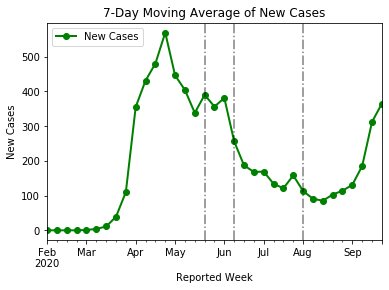

In [87]:
# plotting the average new cases per week around the time when cities moved to stage 1, 2 and 3
fig = plt.figure()  # initiate the figure environment
data2['New Cases'].plot(color='green', linewidth=2, marker='o', legend=True)
plt.ylabel('New Cases')
# Make sure you change the title of the figure accordingly. 
plt.title('7-Day Moving Average of New Cases')
# This last line of code draws the vertical line in the plot when the last city moved to stage 1, 2 and 3
plt.axvline(x='2020-05-19', color='k', linestyle='-.', alpha=.5, label='Stage 1')
plt.axvline(x='2020-06-12', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-07-29', color='k', linestyle='-.', alpha=.5, label='Stage 3')

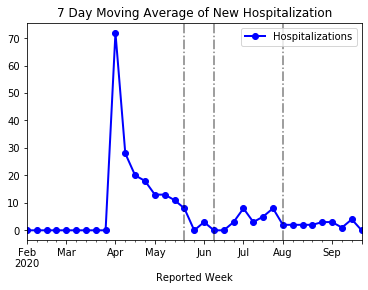

In [88]:
# plotting the average hospitalizations per week around the time when cities moved to stage 1, 2 and 3
fig = plt.figure()  # initiate the figure environment
data2['New Patients Hospitalized'].plot(label='Hospitalizations',kind="line", legend=True, linewidth=2, marker='o', color='blue')

# Make sure you change the title of the figure accordingly. 
plt.title('7 Day Moving Average of New Hospitalization')

# This last line of code draws the vertical line in the plot when the last city moved to stage 1, 2 and 3
plt.axvline(x='2020-05-19', color='k', linestyle='-.', alpha=.5, label='Stage 1')
plt.axvline(x='2020-06-12', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-07-29', color='k', linestyle='-.', alpha=.5, label='Stage 3')

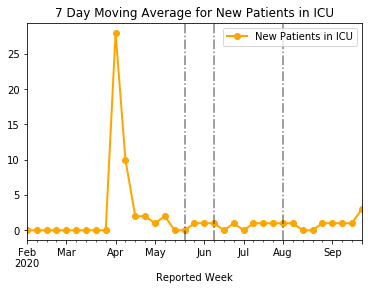

In [89]:
# plotting the average entering the ICU per week around the time when cities moved to stage 1, 2 and 3
data2['New Patients in ICU'].plot(label='New Patients in ICU',kind="line", legend=True, linewidth=2, marker='o', color='orange')

# Make sure you change the title of the figure accordingly. 
plt.title('7 Day Moving Average for New Patients in ICU')

# This last line of code draws the vertical line in the plot when the last city moved to stage 1, 2 and 3
plt.axvline(x='2020-05-19', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-06-12', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-07-29', color='k', linestyle='-.', alpha=.5, label='Stage 3')

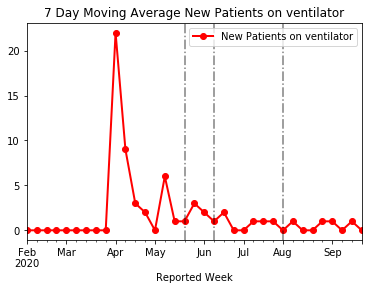

In [90]:
# plotting the average who use a venitaltor in the ICU per week around the time when cities moved to stage 1, 2 and 3
data2['New Patients on ventilator'].plot(label='New Patients on ventilator',kind="line", legend=True, linewidth=2, marker='o', color='red')

# Make sure you change the title of the figure accordingly. 
plt.title('7 Day Moving Average New Patients on ventilator')

# This last line of code draws the vertical line in the plot when the last city moved to stage 1, 2 and 3
plt.axvline(x='2020-05-19', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-06-12', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-07-29', color='k', linestyle='-.', alpha=.5, label='Stage 3')

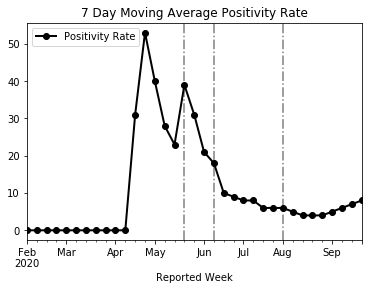

In [91]:
# plotting the average who use a venitaltor in the ICU per week around the time when cities moved to stage 1, 2 and 3
data2['Positivity Rate'].plot(label='Positivity Rate',kind="line", legend=True, linewidth=2, marker='o', color='black')

# Make sure you change the title of the figure accordingly. 
plt.title('7 Day Moving Average Positivity Rate')

# This last line of code draws the vertical line in the plot when the last city moved to stage 1, 2 and 3
plt.axvline(x='2020-05-19', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-06-12', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-07-29', color='k', linestyle='-.', alpha=.5, label='Stage 3')

### Build a timeseries forecast

In [92]:
# Building the moving average model
# Moving average method models the next step in the sequence as a linear function of the residual errors from a mean process at prior time steps.
from statsmodels.tsa.arima_model import ARMA

In [93]:
#Fit the model
model = ARMA(data2['New Cases'], order=(0, 1))
model_fit = model.fit(disp=False)

/Users/abdirahmanali/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


In [94]:
# This makes a prediction of what the average positive cases would be at the begining of the following week
yhat = model_fit.predict(len(data2['New Cases']), len(data2['New Cases']))
print(round(yhat),0)

2020-10-04    264.0
Freq: W-SUN, dtype: float64 0
